In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Churn_Modelling.csv')
df = pd.DataFrame(data)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## def display_count_values(df, cols=[], contains=None)

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def display_count_values(df, cols=[], contains=None):
  if contains and len(cols) == 0:
    cols = df.columns
  cols_contains = [] if contains else cols
  for i in range(0, len(cols)):
    cont_data = pd.DataFrame({
      "Sum": df[cols[i]].value_counts()
      })
    cont_data_v2 = cont_data.rename_axis(cols[i]).reset_index()
    if contains:
      if contains in cont_data_v2[cols[i]].values:
        cols_contains.append(cols[i])
        display(cont_data_v2)
        print("")
    else:
      display(cont_data_v2)
      print("")
  return cols_contains

# Missing Values

## Check is null values

In [ ]:
display(df.isnull().sum())
df.shape

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

(10000, 14)

# set df_before and df_after to compare before and after encoding and feature scalling

In [ ]:
df_before = df.copy()
df_after = df.copy()

# OneHot Encoding

## Geography

In [ ]:
one_hot = pd.get_dummies(df_after['Geography'], prefix='Geography')
df_after = df_after.drop('Geography', axis=1)
df_after = df_after.join(one_hot)

print("before encoding \n")
display_count_values(df_before, ['Geography'])
print("")

print("after encoding \n")
cols = [col for col in df_after.columns if 'Geography' in col]
display_count_values(df_after, cols)

before encoding 



,Geography,Sum
0,France,5014
1,Germany,2509
2,Spain,2477




after encoding 



,Geography_France,Sum
0,1,5014
1,0,4986


,Geography_Germany,Sum
0,0,7491
1,1,2509


,Geography_Spain,Sum
0,0,7523
1,1,2477


['Geography_France', 'Geography_Germany', 'Geography_Spain']

##Label Encoding

#Gender

In [ ]:
df_after['Gender']=df_after['Gender'].map({'Male':1,'Female':0})

In [ ]:
print("before encoding \n")
display_count_values(df_before, ['Gender'])
print("")

print("after encoding \n")
cols = [col for col in df_after.columns if 'Gender' in col]
display_count_values(df_after, cols)

before encoding 



,Gender,Sum
0,Male,5457
1,Female,4543




after encoding 



,Gender,Sum
0,Male,5457
1,Female,4543


['Gender']

# Feature Scaling

## def show_distplot(df, cols)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def show_distplot(df, cols):
  for i in range(0, len(cols)):
    facet = sns.displot(data=df, x=cols[i], col='Exited', kde=True, color='lightblue', height=5, aspect=1.75)
    for col_value, ax in facet.axes_dict.items():
      mean=round(df[cols[i]][(df.Exited == col_value)].mean(), 2)
      median=df[cols[i]][(df.Exited == col_value)].median()
      mode=df[cols[i]][(df.Exited == col_value)].mode().values[0]
      ax.axvline(mean, color='maroon', linestyle='--', label=f"Mean {mean}")
      ax.axvline(median, color='forestgreen', linestyle='-', label=f"Median {median}")
      ax.axvline(mode, color='darkorange', linestyle='-', label=f"Mode {mode}")
      ax.legend()

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
cols = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]
df_after[cols] = StandardScaler().fit_transform(df_after[cols])

## displot before standardization

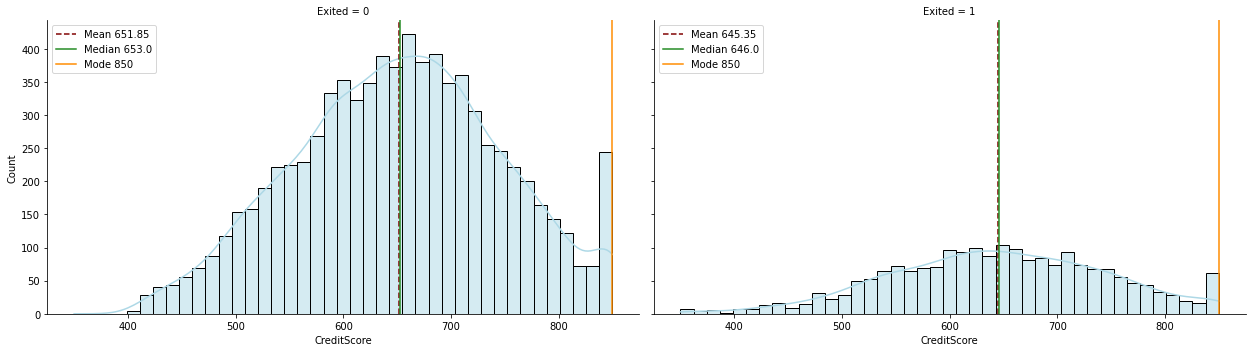

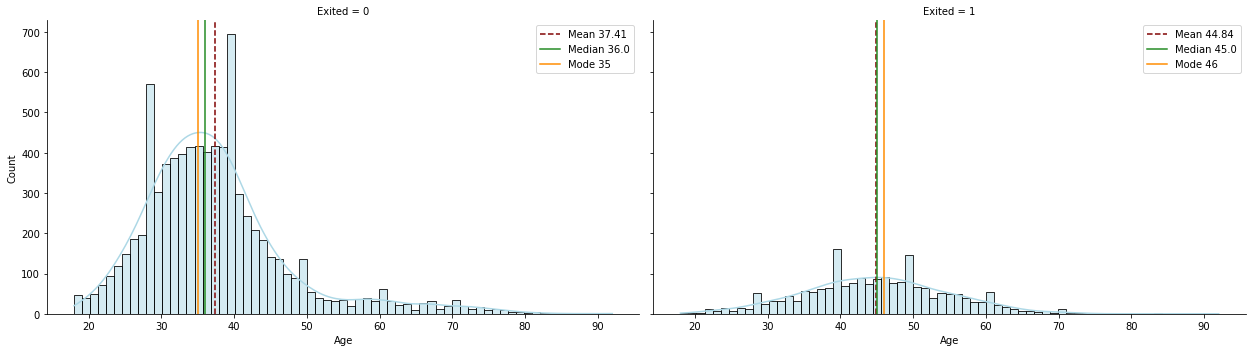

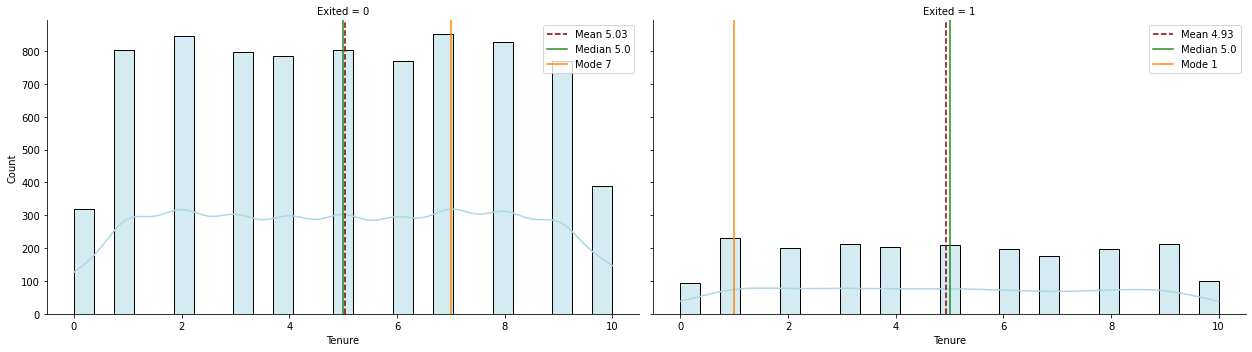

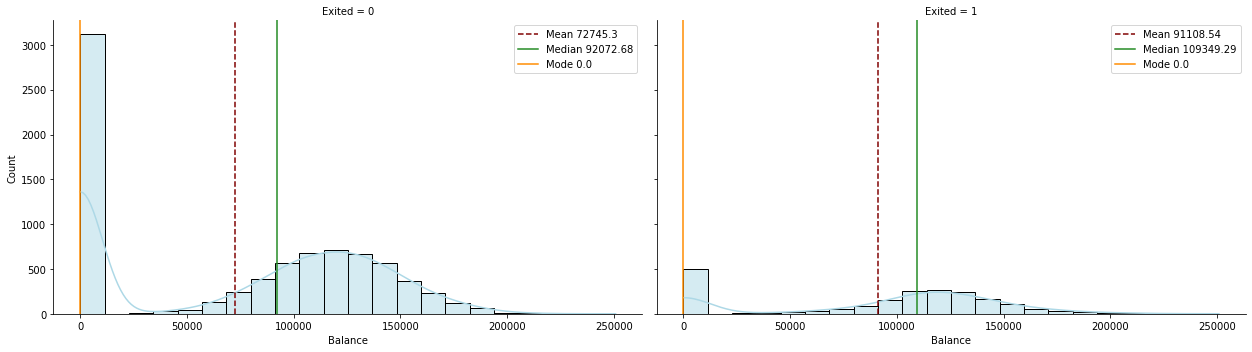

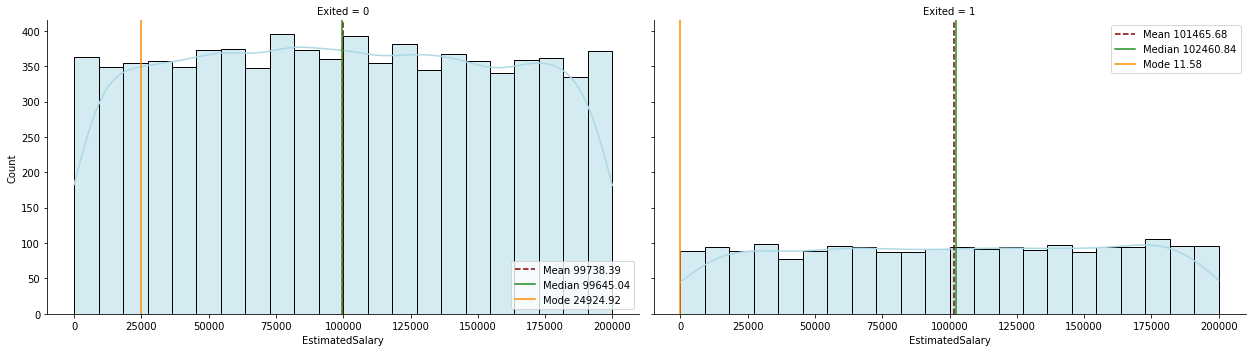

In [ ]:
show_distplot(df_before, cols)

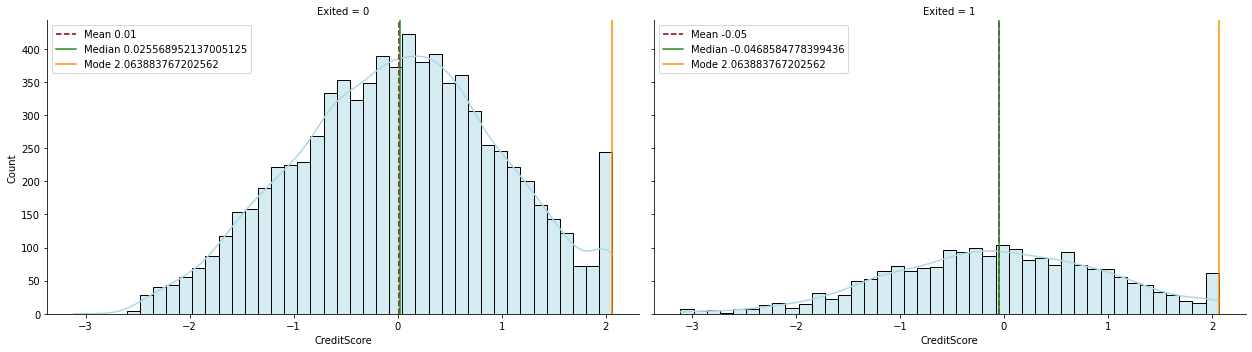

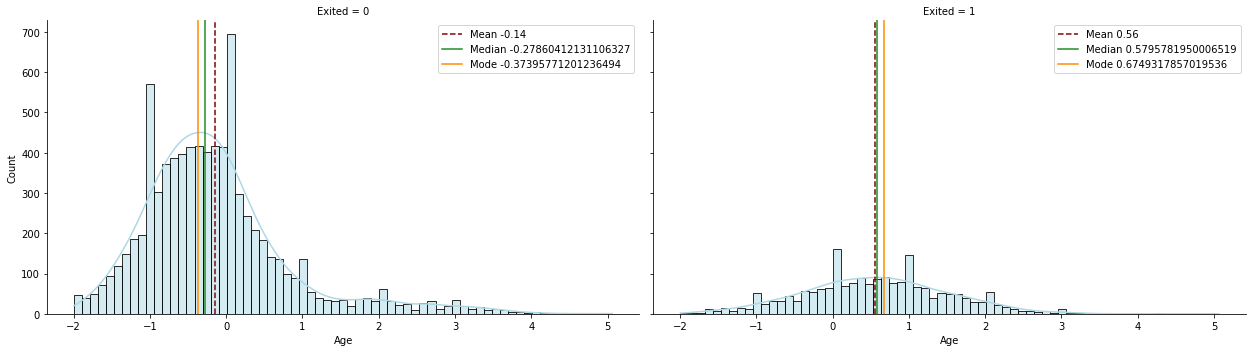

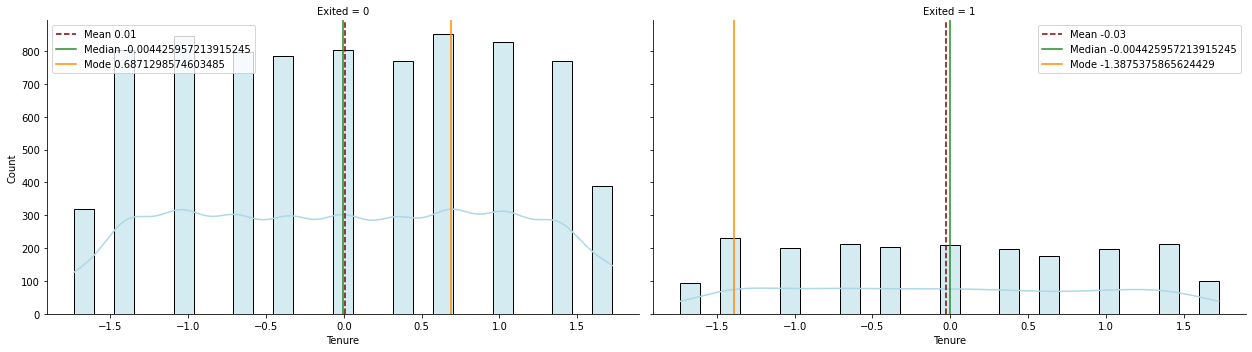

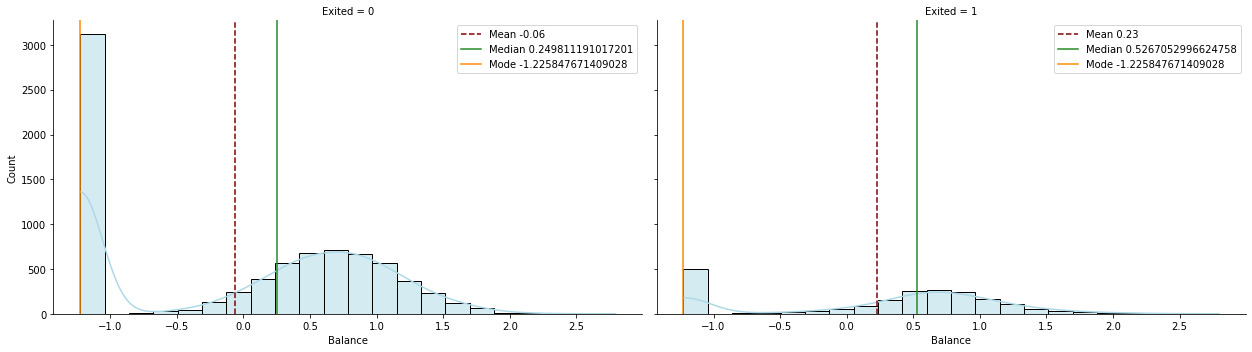

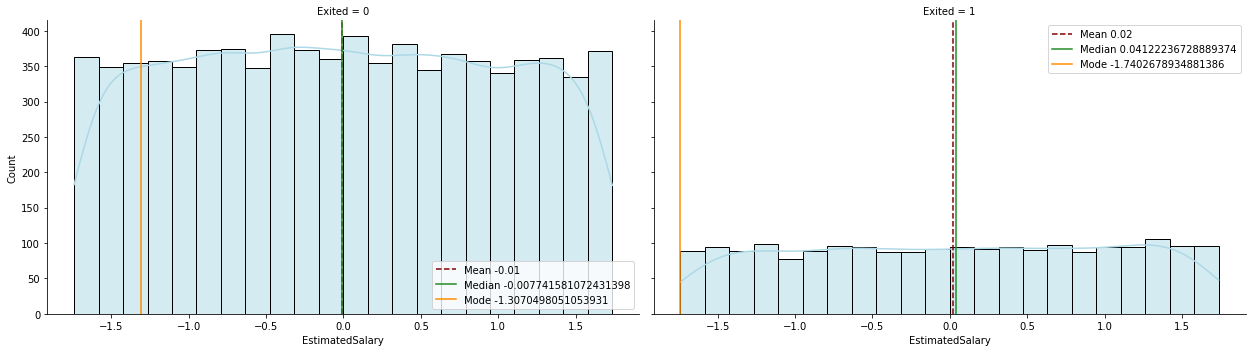

In [ ]:
show_distplot(df_after, cols)

## def show_histplot(fig, axes, df, cols)

In [ ]:
def show_histplot(fig, axes, df, cols):
  axes = axes.flatten() # reshape from 3x4 array into 12-element vector
  for i in range(0, len(cols)):
      plt.sca(axes[i]) # set the current Axes
      sns.histplot(data=df, x=cols[i], kde=True, hue="AttritionFlag")
      # plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

  plt.tight_layout()

## Histplot before standardization

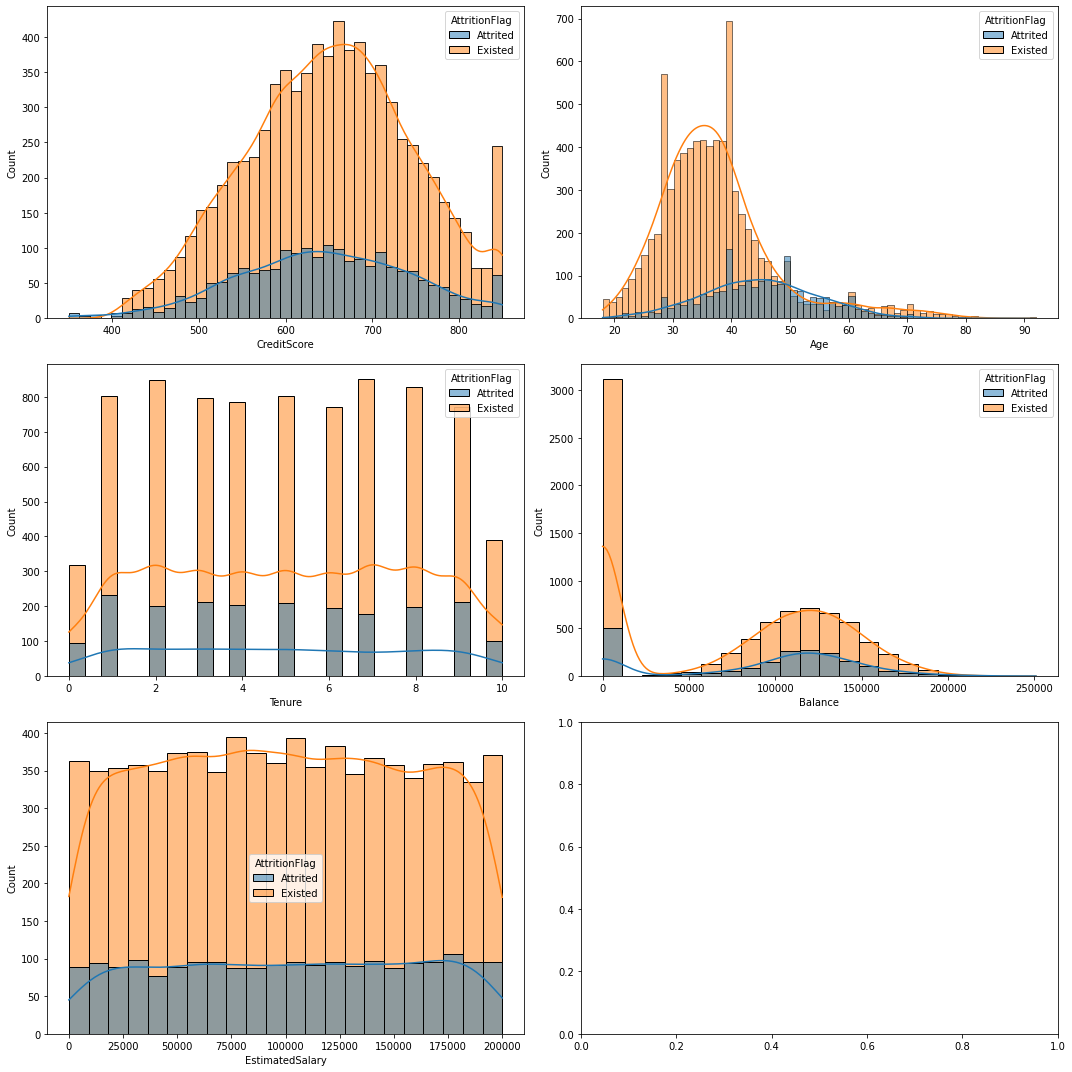

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
show_histplot(fig, axes, df_before, cols)

## Histplot after standardization

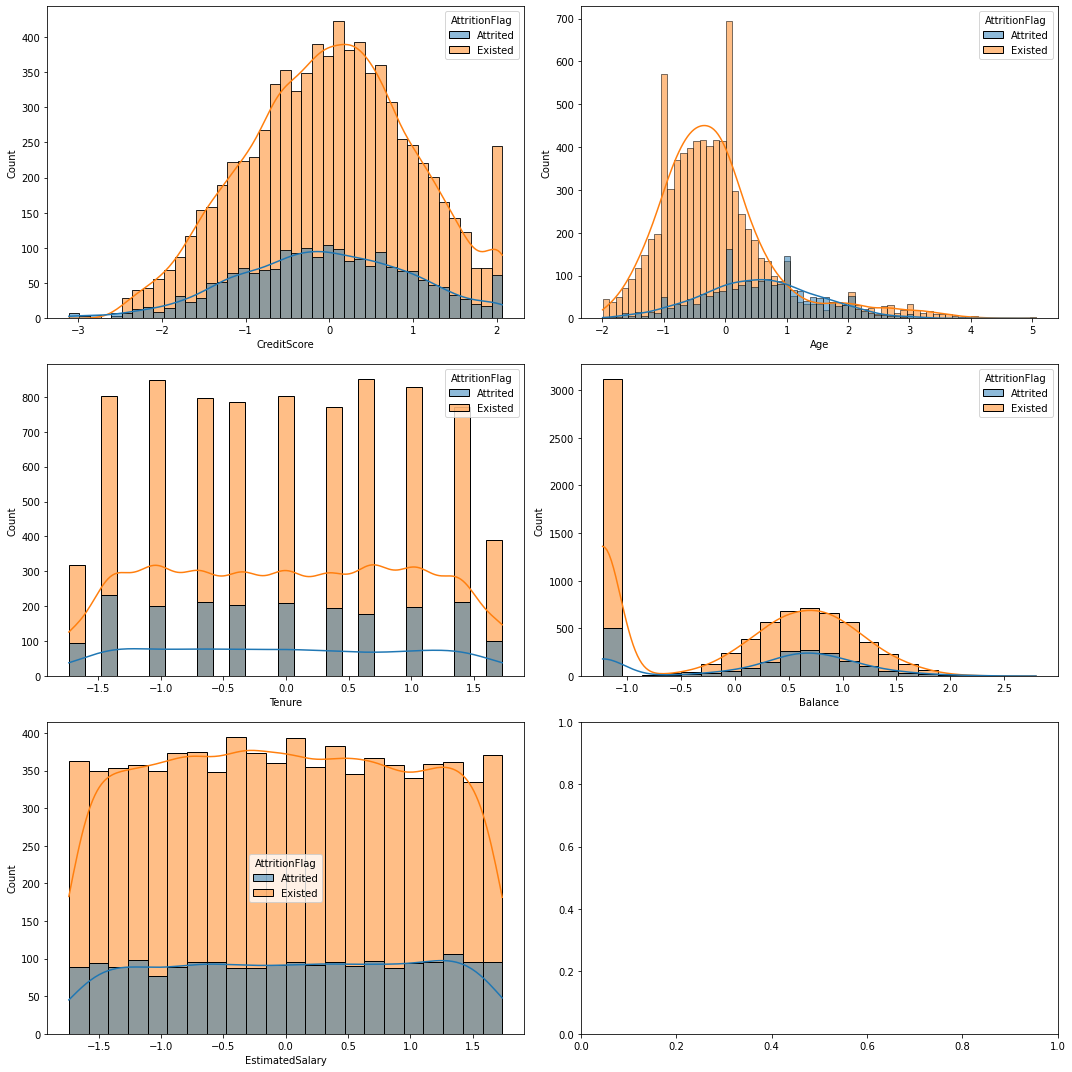

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
show_histplot(fig, axes, df_after, cols)

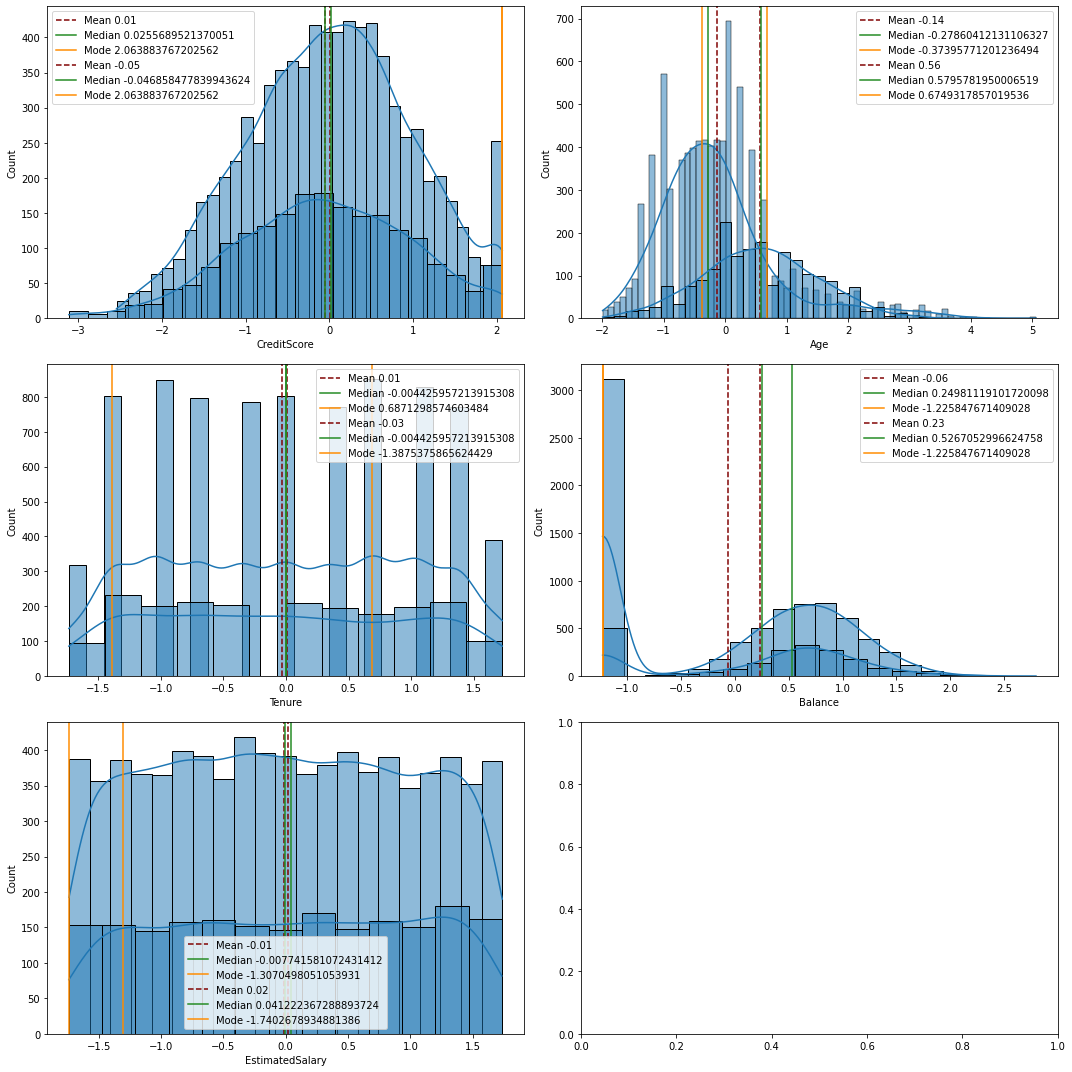

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(0, len(cols)):
  for j in ["Existed", "Attrited"]:
    plt.sca(axes[i]) # set the current Axes
    sns.histplot(data=df_after[(df_after.AttritionFlag == j)], x=cols[i], kde=True)
    mean=round(df_after[cols[i]][(df_after.AttritionFlag == j)].mean(), 2)
    median=df_after[cols[i]][(df.AttritionFlag == j)].median()
    mode=df_after[cols[i]][(df_after.AttritionFlag == j)].mode().values[0]
    axes[i].axvline(mean, color='maroon', linestyle='--', label=f"Mean {mean}")
    axes[i].axvline(median, color='forestgreen', linestyle='-', label=f"Median {median}")
    axes[i].axvline(mode, color='darkorange', linestyle='-', label=f"Mode {mode}")
    axes[i].legend()

plt.tight_layout()

In [ ]:
df_before.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_after.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,-0.326221,0,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1,1,0,0
1,2,15647311,Hill,-0.440036,0,0.198164,-1.387538,0.117350,1,0,1,0.216534,0,0,0,1
2,3,15619304,Onio,-1.536794,0,0.293517,1.032908,1.333053,3,1,0,0.240687,1,1,0,0
3,4,15701354,Boni,0.501521,0,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0,1,0,0
4,5,15737888,Mitchell,2.063884,0,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0,0,0,1


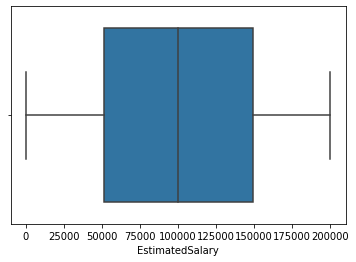

In [ ]:
sns.boxplot(x=df_before['EstimatedSalary'])

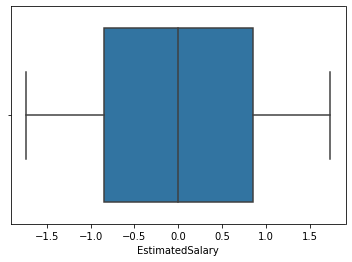

In [ ]:
sns.boxplot(x=df_after['EstimatedSalary'])

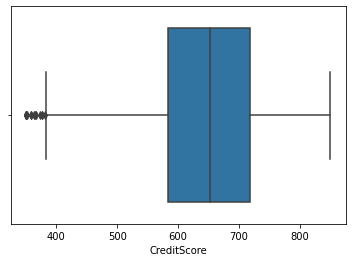

In [ ]:
sns.boxplot(x=df_before['CreditScore'])

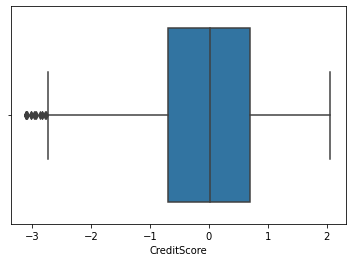

In [ ]:
sns.boxplot(x=df_after['CreditScore'])

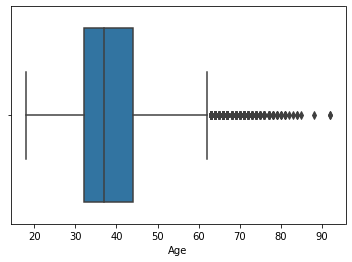

In [ ]:
sns.boxplot(x=df_before['Age'])

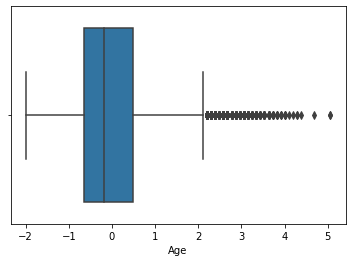

In [ ]:
sns.boxplot(x=df_after['Age'])

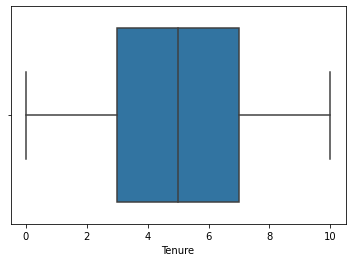

In [ ]:
sns.boxplot(x=df_before['Tenure'])

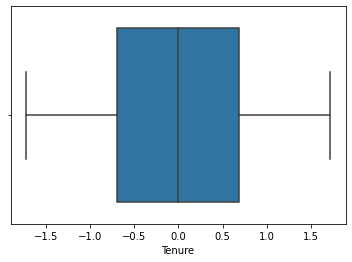

In [ ]:
sns.boxplot(x=df_after['Tenure'])

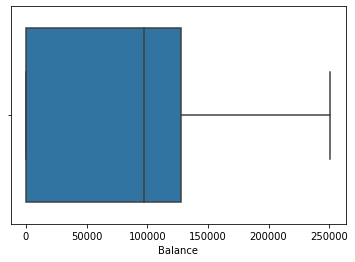

In [ ]:
sns.boxplot(x=df_before['Balance'])

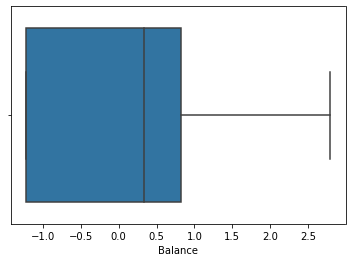

In [ ]:
sns.boxplot(x=df_after['Balance'])

In [ ]:
df_after

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,-0.326221,Female,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1,1,0,0
1,2,15647311,Hill,-0.440036,Female,0.198164,-1.387538,0.117350,1,0,1,0.216534,0,0,0,1
2,3,15619304,Onio,-1.536794,Female,0.293517,1.032908,1.333053,3,1,0,0.240687,1,1,0,0
3,4,15701354,Boni,0.501521,Female,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0,1,0,0
4,5,15737888,Mitchell,2.063884,Female,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,1.246488,Male,0.007457,-0.004426,-1.225848,2,1,0,-0.066419,0,1,0,0
9996,9997,15569892,Johnstone,-1.391939,Male,-0.373958,1.724464,-0.306379,1,1,1,0.027988,0,1,0,0
9997,9998,15584532,Liu,0.604988,Female,-0.278604,0.687130,-1.225848,1,0,1,-1.008643,1,1,0,0
9998,9999,15682355,Sabbatini,1.256835,Male,0.293517,-0.695982,-0.022608,2,1,0,-0.125231,1,0,1,0


In [ ]:
from sklearn import preprocessing
#Drop unused columns

df.drop(columns=["RowNumber","CustomerId","Surname"],
                  inplace=True)

df_clean = df.copy()


#One Hot Encoding

one_hot = pd.get_dummies(df_clean['Geography'], prefix='Geography')
df_clean = df_clean.drop('Geography', axis=1)
df_clean = df_clean.join(one_hot)

#Label Encoding
df_clean['Gender']=df_clean['Gender'].map({'Male':1,'Female':0})

In [ ]:
df_clean

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
cols = ["CreditScore","Age","Tenure","Balance","EstimatedSalary","NumOfProducts","HasCrCard","IsActiveMember","Gender","Geography_France","Geography_Germany","Geography_Spain"]
df_clean[cols] = StandardScaler().fit_transform(df_clean[cols])

In [ ]:
df_clean

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,-0.326221,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1,0.997204,-0.578736,-0.573809
1,-0.440036,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0,-1.002804,-0.578736,1.742740
2,-1.536794,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1,0.997204,-0.578736,-0.573809
3,0.501521,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0,0.997204,-0.578736,-0.573809
4,2.063884,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0,-1.002804,-0.578736,1.742740
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,0,0.997204,-0.578736,-0.573809
9996,-1.391939,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,0,0.997204,-0.578736,-0.573809
9997,0.604988,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1,0.997204,-0.578736,-0.573809
9998,1.256835,0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1,-1.002804,1.727904,-0.573809
